In [26]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn as sk
from scipy import signal


In [290]:
# parameters
i_spk = 3 # action potential current in nA
i_syn = 0.02 * 20000 * 0.002 # synaptic current nA, current of single synapse X number_syn X prob_presyn_active

c_ext = 0.3 # conductivity in S/m

dt = 0.001 # time step in s
dx = 0.0001 # space step in m
area_sim = 0.05 # length of simulated surface, in m
dur_sim = 1 # duration of simulation, in s

scale_loc = 4 # scaling term for global signal


In [330]:
t = np.arange(0, dur_sim, dt) # time vector
locs = np.arange(-area_sim/2, area_sim/2, dx) # location vector

# inputs
sig_gbl = signal.detrend(np.cumsum(np.random.normal(0, 1, t.size)))/10 # global input
sig_gbl = np.convolve(sig_gbl, np.ones(10)/10, mode='same') # smooth global input

# convolve sig_loc with a gaussian kernel
sig_kern = np.exp(-np.linspace(-3, 3, 200)**2);
sig_loc = np.zeros(t.size) # local input
sig_loc[np.where((t >=0.2)&(t<0.3), True, False)] = 1 
sig_loc = np.convolve(sig_loc, sig_kern/np.sum(sig_kern), mode='same')

# noise input
sig_noise = np.random.normal(0, 0.1, (locs.size, t.size))

# total signal
inp_gbl = sig_gbl * np.ones((locs.size,1))
inp_loc = sig_loc * np.exp(-locs**2/(2*0.01**2)).reshape((locs.size,1))
inp = (inp_gbl + (inp_loc + sig_noise) * scale_loc)

# simulate spiking
spks = np.random.poisson(np.exp(inp)*dt, (locs.size, t.size)) # simulate spiking


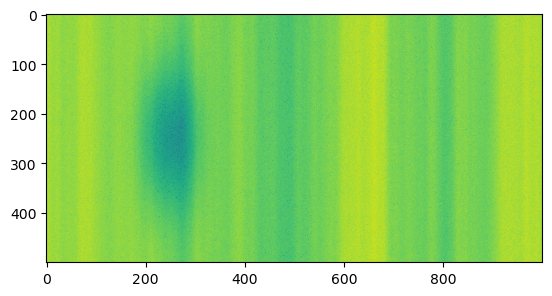

In [331]:
i_sim = -(inp*i_syn + spks*i_spk) * 10**-9# simulate current
fig, ax = plt.subplots()
ax.imshow(i_sim)

In [358]:
h = 0.01 # electrode height in m, 13 mm for skull + dura thickness

# ADD ELECTRODE SIZE

dists = np.sqrt(locs**2 + h**2)

lfp = (1/4*np.pi*c_ext) * np.sum(i_sim/(dists.reshape((dists.size,1))),axis=0) # calculate LFP, 

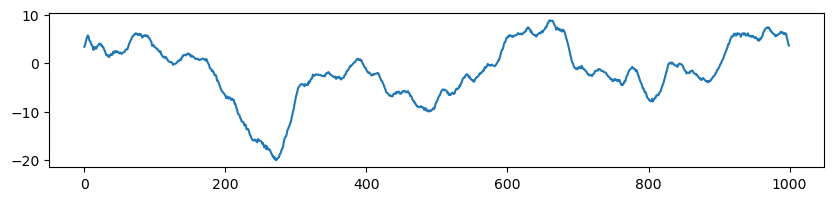

In [359]:
fig, ax = plt.subplots(figsize=(10,2))
ax.plot(lfp*10**6)
plt.show()